<a href="https://colab.research.google.com/github/DolevKaiser/Machine-Learning/blob/main/Colab_PyTorch_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colaboratory

## Jupyter notebook
Today we will briefly talk about *notebooks*. A Jupyter notebook lets you write and execute Python code locally in your web browser. Jupyter notebooks make it very easy to tinker with code and execute it in bits and pieces; for this reason they are widely used in scientific computing. In fact, homework assignments in this course are to be submitted as notebook files (.ipynb).

## Colab
[Colab](https://research.google.com/colaboratory/faq.html) is a development enviornment for Jupyter notebooks that is particularly suited for machine learning and data analysis, which runs entirely in the cloud. Colab allows to create and evaluate notebooks in an incredibely easy-to-use manner: it’s free, requires no setup, comes preinstalled with many packages, and is easy to share with the world. Additional information can be found in the following links:
1.   [Intro to Google Colab Video](https://www.youtube.com/watch?v=inN8seMm7UI)
2.   [Welcome to Colab](https://colab.research.google.com/notebooks/intro.ipynb)

### Setting Up
To use Colab, you must have a Google account with an associated Google Drive. Assuming you have both, you can connect Colab to your Drive with the following steps:

1.  Enter your Google drive webpage.
2.  Click the wheel in the top right corner and select `Settings`.
3.  Click on the `Manage Apps` tab.
4.  At the top, select `Connect more apps` which should bring up a GSuite Marketplace window.
5.  Search for `Google Colaboratory` then click `Add`.
6.  Return to your Google drive webpage, then right click > `More` > `Google Colaboratory` will open a new untitlted notebook in colab.
7. At the top left, select either `+ Code` or `+ Text` to open cells for writing code or text, respectivly.

### Hardware accelerators
Colab notebooks benefit from free execution on GPUs and TPUs. By default, Google Colab runs on CPUs, and to use GPUs, you need to activate them manually, via code (will be shown later on) or directly via `Runtime`: from the top menu > `Change runtime type` > `Hardware accelerator` > `GPU` > `Save`.

### Terminal Input
While Google Colab provides a user-friendly environment for working with Jupyter notebooks, there are times when you may need to use the terminal input. The terminal input allows you to execute commands on the command line, just as you would in a local terminal on your computer. This can be useful for, e.g., installing packages, running scripts, and navigating file directories. For instance, after you have selected GPU as the hardware accelerator, you can verify that the GPU is available by running the following code in a code cell:


In [ ]:
!nvidia-smi # viewing the GPU

!python -c 'print("Hello, world!")' # print the phrase “Hello, world!” in Python

#!pip install numpy # This will install the NumPy package in your Google Colab environment, and you can then use it in your Python code
# Verify NumPy installation
import numpy as np
np.__version__


Wed Jan 10 09:50:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

'1.23.5'

### Debugging
Despite being such an easy-going IDE, local ones (such as PyCharm) provide improved debug capabilities, and large projects may be easier to implement and experiment locally. Yes, you can always use `print()` as a quick substitute for a debugger, but sometimes you need to explore the problem more in the state it occurred, learn how the program is being executed, etc. In those cases debuggers are super handy.



In [ ]:
import pdb # s(tep); n(ext); q(uit)
def fib(n):
  if n<=1:
    return n
  arr = [0, 1]
  for i in range(2, n+1):
    pdb.set_trace()
    arr.append(arr[i-1]+arr[i-2])
  return arr[n]

fib(9)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/bdb.py", line 336, in set_trace
    sys.settrace(self.trace_dispatch)



> <ipython-input-2-714fe9398951>(8)fib()
      6   for i in range(2, n+1):
      7     pdb.set_trace()
----> 8     arr.append(arr[i-1]+arr[i-2])
      9   return arr[n]
     10 

ipdb> arr
[0, 1]
ipdb> i
2
ipdb> q



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/bdb.py", line 361, in set_quit
    sys.settrace(None)



To get help in notebook, just annotate the function / class with a question mark. For example, here is how we get help on `print` function

In [ ]:
print?
pdb?

### Disconnections  
The main drawback of Colab is probably the fact that it disconnects after approximately **12 hours or 30 minutes of idling**. This can be walked around by saving intermidiate calculations when performnig long trainings. Nonetheless, this tutorial does not deal with local installations of Python, and every assignment in the course can be implemented using the free version of Colab (assuming you have a Google account).

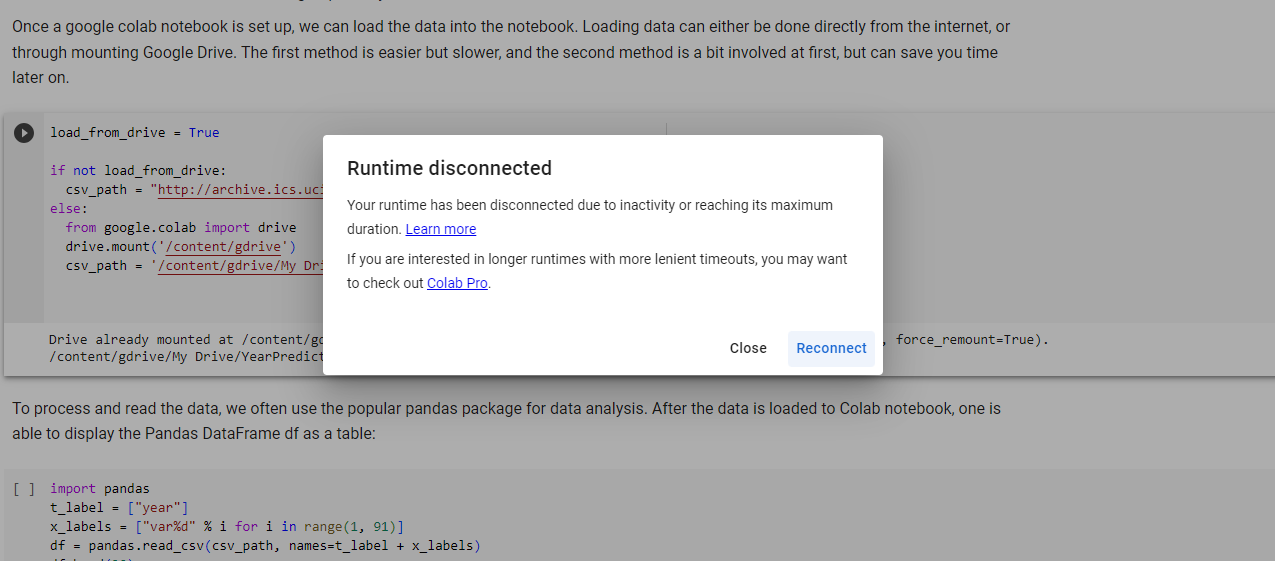

# PyTorch

PyTorch is a Python based scientific computing package which provides two key features:


*   Computations that use the power of GPUs
*   A deep learning research platform that provides maximum flexibility and speed

Throughout this course, we will focus mostly on the integrated deep learning tools of Pytorch (via the *torch.nn* class) and the data loading and transformation features (via the *torch.utils.data* class). These will be discussed later in the course (once we start playing with data and training deep networks). Until then, we will brifly go over the following.


In [ ]:
import torch
import numpy as np

## Tensors
Tensors are similar to NumPy’s ndarrays, except that tensors can run on  GPUs (or other accelerators) and are also optimized for automatic differentiation (we’ll see more about that later), giving rise to store learnable models as Tensors. In fact, tensors and NumPy arrays can be bridged as they often share the same underlying memory, eliminating data copying.

### Tensor initialization, attributes and bridging with NumPy
Tensors can be initialized in various ways, and are then attributed with hape, datatype, and the device on which they are stored. By default, tensors are created on the CPU, and can be explicitly moved to GPU (if avilable) using `.to` method.

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data) #  directly from data
print(x_data)

x_ones = torch.ones_like(x_data) # from another tensor, retaining its properties
print(x_ones)

shape = (2,3)
rand_tensor = torch.rand(shape) # randomly with numbers in [0,1]
print(rand_tensor)


print(f"Shape of tensor: {rand_tensor.shape}")
print(f"Datatype of tensor: {rand_tensor.dtype}")
print(f"Device tensor is stored on: {rand_tensor.device}")

# We move our tensor to the GPU if available
if torch.cuda.is_available():
    rand_tensor = rand_tensor.to("cuda")
print(f"Device tensor is stored on: {rand_tensor.device}")

tensor([[1, 2],
        [3, 4]])
tensor([[1, 1],
        [1, 1]])
tensor([[0.2768, 0.8869, 0.4034],
        [0.2873, 0.3484, 0.9204]])
Shape of tensor: torch.Size([2, 3])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Device tensor is stored on: cuda:0


In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array) # Tensors can be created from NumPy arrays
print(np_array)
print(f'NumPy to Tensor: {x_np}')
print(f"Device tensor is stored on: {x_np.device}")
if torch.cuda.is_available():
    x_np = x_np.to("cuda")
print(f"Device tensor is stored on: {x_np.device}")
print(f'Tensor back to NumPy: {x_np.cpu().numpy()}') # Tensor to NumPy array, must be first sent to cpu!

[[1 2]
 [3 4]]
NumPy to Tensor: tensor([[1, 2],
        [3, 4]])
Device tensor is stored on: cpu
Device tensor is stored on: cuda:0
Tensor back to NumPy: [[1 2]
 [3 4]]


Other arithmetic (in-place) tensors operations, as well as standard numpy-like indexing and slicing, can by found in the [documnetation](https://pytorch.org/tutorials/beginner/basics/intro.html).


# A Glimpse on data
Deep learning is all about *data*-driven models. For example, think of a model that predicts in which century a piece of music was released. A sutible dataset for such a task can be, e.g., the "YearPredictionMSD Data Set" based on the Million Song Dataset. The data is available to download from the UCI Machine Learning Repository.


Once a google colab notebook is set up, we can load the data into the notebook. Loading data can either be done directly from the internet, or through mounting Google Drive. The first method is easier but slower, and the second method is a bit involved at first, but can save you time later on.

## Mounting drive
Get acess to the foldes in Google Drive to be used in Google Colab.

In [ ]:
load_from_drive = False

if not load_from_drive:
  !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
  csv_path = '/content/gdrive/My Drive/YearPredictionMSD.txt.zip'
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/gdrive/MyDrive/IntroToDeep/Fall 2023/Excercises/week 2 - Intro to Python +  Pytorch/YearPredictionMSD.txt.zip'
  Ben = '/content/gdrive/MyDrive/IntroToDeep/Fall 2023/Excercises/week 2 - Intro to Python +  Pytorch/YearPredictionMSD.txt.zip'
  Natalie = '/content/gdrive/My Drive/YearPredictionMSD.txt.zip'
  csv_path = Natalie # put yours



--2024-01-10 10:17:17--  http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘YearPredictionMSD.txt.zip’

YearPredictionMSD.t     [            <=>     ] 201.24M  84.5MB/s    in 2.4s    

2024-01-10 10:17:19 (84.5 MB/s) - ‘YearPredictionMSD.txt.zip’ saved [211011981]



 ## Pandas
 To process and read the data, we often use the popular `Pandas` package for data analysis. After the data is loaded to Colab notebook, one is able to display the Pandas DataFrame df as a table:

In [ ]:
import pandas
t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
csv_path = 'YearPredictionMSD.txt.zip'
df = pandas.read_csv(csv_path, names=t_label + x_labels)
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,2001,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,2001,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,2001,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,2007,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Each record consists of 91 features. The first feature is the year in which the song was composed, and the remaining 90 features are various quantities (float) related to the song audio.
For simplicity, it is possible to construct a binary clssifier by using the "year" field to represent whether or not a song was released in the 20-th century. In our case df["year"] will be 1 if the release year was after 2000, and 0 otherwise.

In [ ]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [ ]:
 df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,1,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,1,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,1,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,1,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,1,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


In [ ]:
print(f'Out of {len(df)} songs, there are {len(df[df.year == 1])} positive examples and {len(df[df.year == 0])} negative ones.')

Out of 515345 songs, there are 289115 positive examples and 226230 negative ones.
